In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [18]:
import tensorflow_datasets as tfds

In [16]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [19]:
dataset = tfds.load(name="mnist")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Sun-ho Kim\tensorflow_datasets\mnist\3.0.1.incomplete1UUG5V\mnist-train.tfrecord*...:   0%|…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling C:\Users\Sun-ho Kim\tensorflow_datasets\mnist\3.0.1.incomplete1UUG5V\mnist-test.tfrecord*...:   0%| …

Dataset mnist downloaded and prepared to C:\Users\Sun-ho Kim\tensorflow_datasets\mnist\3.0.1. Subsequent calls will reuse this data.


In [20]:
mnist_train, mnist_test = dataset["train"], dataset["test"]

In [21]:
mnist_train = mnist_train.shuffle(10000).batch(32).prefetch(1)

In [22]:
for item in mnist_train:
    images = item["image"]
    labels = item["label"]

In [29]:
print(images)
print(labels)

tf.Tensor(
[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
  

In [31]:
print(type(len(labels)))

<class 'int'>


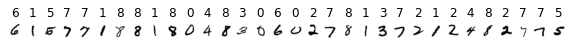

In [46]:
plt.figure(figsize=(10,5))
for index in range(len(labels)):
    plt.subplot(1,len(labels), index + 1)
    image = images[index, ..., 0]
    label = labels[index].numpy()
    plt.imshow(image, cmap="binary")
    plt.title(label)
    plt.axis("off")

In [49]:
mnist_train = dataset["train"]

In [50]:
mnist_train2 = mnist_train.shuffle(10000).batch(32)
mnist_train2 = mnist_train2.map(lambda items: (items["image"], items["label"]))
mnist_train2 = mnist_train2.prefetch(1)

In [62]:
for i, j in mnist_train2.take(1):
    print(i.shape)
    print(j.numpy())

(32, 28, 28, 1)
[2 1 7 3 2 9 1 6 8 0 6 3 3 1 5 4 5 1 2 5 0 7 0 1 8 5 8 9 1 4 4 1]


In [80]:
datasets = tfds.load(name="mnist", batch_size=32, as_supervised=True)

In [82]:
mnist_train3 = datasets["train"].repeat().prefetch(1)

In [83]:
mnist_train3

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [100]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28, 1]),
    keras.layers.Lambda(lambda image: tf.cast(image, tf.float32)),
    keras.layers.Dense(10, activation="softmax")])
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=["accuracy"])

In [101]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 lambda_6 (Lambda)           (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [102]:
model.fit(mnist_train3, steps_per_epoch=60000 // 32, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 32.0840 - accuracy: 0.8414
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 25.9604 - accuracy: 0.8694
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 24.5928 - accuracy: 0.8743
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 24.1953 - accuracy: 0.8769
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 24.2587 - accuracy: 0.8762


In [104]:
mnist_test = datasets["test"]
model.evaluate(mnist_test)

313/313 [==============================] - 1s 3ms/step - loss: 21.0204 - accuracy: 0.8892


[21.020381927490234, 0.88919997215271]